**Dataset:** Environmental Sensor Telemetry Data

```text
| column   | description          | units      |
|----------|----------------------|------------|
| ts       | timestamp of event   | epoch      |
| device   | different sensors    | string     |
| co       | carbon monoxide      | ppm (%)    |
| humidity | humidity             | percentage |
| light    | light detected?      | boolean    |
| lpg      | liquid petroleum gas | ppm (%)    |
| motion   | motion detected?     | boolean    |
| smoke    | smoke                | ppm (%)    |
| temp     | temperature          | Celcius    |
```

Assumption:
```text
| Dependant Attr| Independant Attr |
|---------------|------------------|
| lpg(Product)  | humidity         | 
| co(byproduct) | temp             | 
                | light            | 
                | motion           | 
                | smoke            | 
```

**Goals:**

**1th:** Optimizing the lpg production

**2nd:** System alert for deviant behaviour

**By:** Descriptive & Diagnostic analysis
 

## Importing

The useful packages and data are imported

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib as mpl
from datetime import datetime


%matplotlib inline 

In [30]:
# Parsing the date to datetime and import the csv file
d_parser = lambda x: pd.to_datetime(x,unit = 's',infer_datetime_format=True)
df = pd.read_csv("https://raw.githubusercontent.com/siamakru/SE_Sample/main/data.csv",parse_dates=['ts'],date_parser=d_parser,infer_datetime_format=True)

# EDA & Getting insight

* Typical Exploratory Data Analysis
* Visuallization

## Exploratory Data Analysis

* The statistical evaluation
* Checking missing value
* Checking consistancy
* Outliers detection
* Positive or negative correlation

In [31]:
# First Rows
df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,2020-07-12 00:01:34.385974646,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,2020-07-12 00:01:34.735567570,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,2020-07-12 00:01:38.073572874,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,2020-07-12 00:01:39.589145899,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,2020-07-12 00:01:41.761234999,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [32]:
# Genral Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ts        100000 non-null  datetime64[ns]
 1   device    100000 non-null  object        
 2   co        100000 non-null  float64       
 3   humidity  100000 non-null  float64       
 4   light     100000 non-null  bool          
 5   lpg       100000 non-null  float64       
 6   motion    100000 non-null  bool          
 7   smoke     100000 non-null  float64       
 8   temp      100000 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(5), object(1)
memory usage: 5.5+ MB


In [33]:
df.isnull().sum()

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64

In [34]:
# Dimenstion / Rows and Columns
df.shape

(100000, 9)

In [35]:
# Statistical Details
df.describe()

,co,humidity,lpg,smoke,temp
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.004680,60.909301,0.007302,0.019438,22.125995
std,0.001137,11.017397,0.001229,0.003519,2.469348
min,0.002264,6.900000,0.004341,0.011142,0.100000
25%,0.004132,51.200000,0.006708,0.017736,19.700001
50%,0.004833,55.200000,0.007513,0.020020,21.900000
75%,0.005114,74.300003,0.007826,0.020912,23.600000
max,0.014420,79.300003,0.016567,0.046590,28.600000


In [36]:
# Rounding "temp" and "humidity" to two decimal point
df['temp'] = round(df.temp, 2)
df['humidity'] = round(df.humidity, 2)

In [37]:
# "Device-Id" Consistancy
df['device'].unique()

array(['b8:27:eb:bf:9d:51', '00:0f:00:70:91:0a', '1c:bf:ce:15:ec:4d'],
      dtype=object)

In [38]:
# Changing the timespace to datetime
df.rename(columns = {'ts':'date'},inplace=True)
df = df.sort_values(by='date', ascending=True)


In [39]:
# Number of days the data is recorded
df.groupby(df.date.dt.day)['lpg'].count()

date
12    50462
13    49538
Name: lpg, dtype: int64

In [53]:
# Number of records for each day for each sensor
df.groupby([df.date.dt.day,'device'])['lpg'].std()

date  device           
12    00:0f:00:70:91:0a    0.002434
      1c:bf:ce:15:ec:4d    0.000220
      b8:27:eb:bf:9d:51    0.000316
13    00:0f:00:70:91:0a    0.001580
      1c:bf:ce:15:ec:4d    0.000258
      b8:27:eb:bf:9d:51    0.000117
Name: lpg, dtype: float64

In [41]:
# Categorizing different sensors to seperated Dataframe
df_sensor3 = df[df["device"] == 'b8:27:eb:bf:9d:51']
df_sensor1 = df[df["device"] == '00:0f:00:70:91:0a']
df_sensor2 = df[df["device"] == '1c:bf:ce:15:ec:4d']       

df_sensor1.reset_index(drop = True, inplace = True)
df_sensor2.reset_index(drop = True, inplace = True)
df_sensor3.reset_index(drop = True, inplace = True)

In [42]:
#encode the boolean columns to integer
df['light'] = df['light'].astype('int32')
df['motion'] = df['motion'].astype('int32')

In [43]:
# Handling Outliers
# Removing the sample on the far ends of the dataset range
# Everything above 0.9 and below 0.1 percentile are outliers and removed
# IQR to set up a “fence” outside of Q1 and Q3.
print(f'Before Filtering: {len(df_sensor1)}')

def outliers_remove(df,col,min_thresh,max_thresh):
  
  q1 = df[col].quantile(min_thresh)
  q2 = df[col].quantile(max_thresh)
  IQR = q2 - q1

  df = df[(df[col]<(q2 + 1.5*IQR)) & (df[col]>(q1 - 1.5*IQR))]

  return df

df_sensor1 = outliers_remove(df_sensor1,'co',0.1,0.9)
df_sensor1 = outliers_remove(df_sensor1,'lpg',0.1,0.9)

print(f'After Filtering: {len(df_sensor1)}')

Before Filtering: 46564
After Filtering: 45939


## Visuallization

In [ ]:
# Correlation of the data for sensor1
correlations = df_sensor1.corr()
correlations 

In [ ]:
# Correaltion for 'lpg'
print(correlations["lpg"])
sns.heatmap(correlations,annot = True,cmap="YlGnBu")
plt.show()

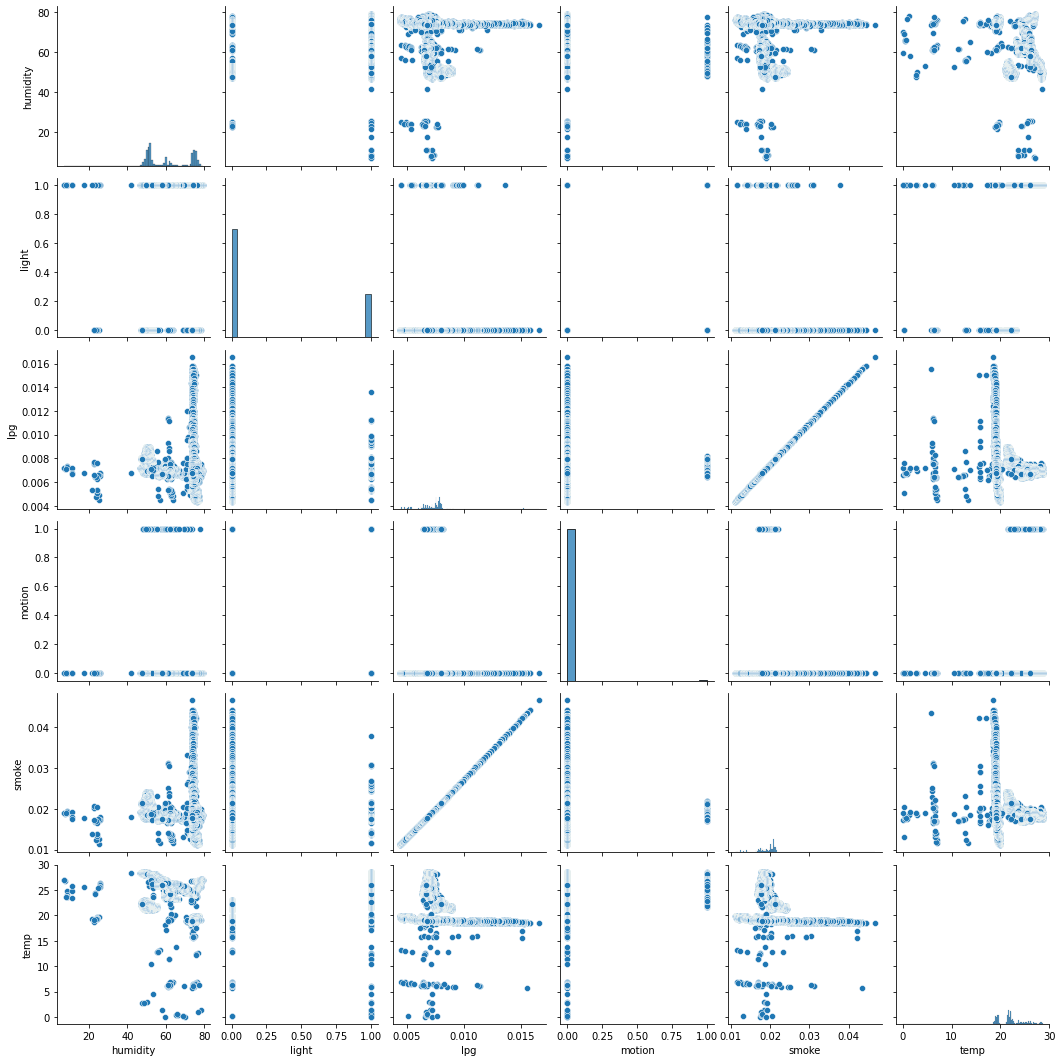

In [52]:
# Finding out any linear or non-linear correlation btw attributes
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


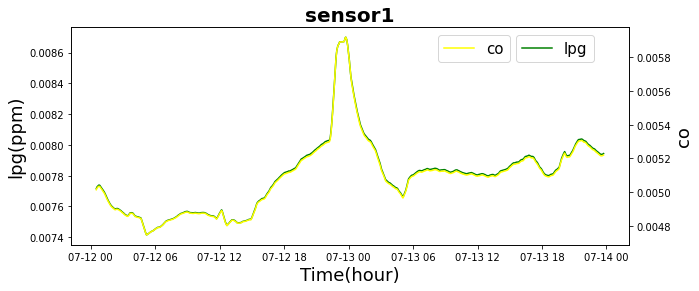

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


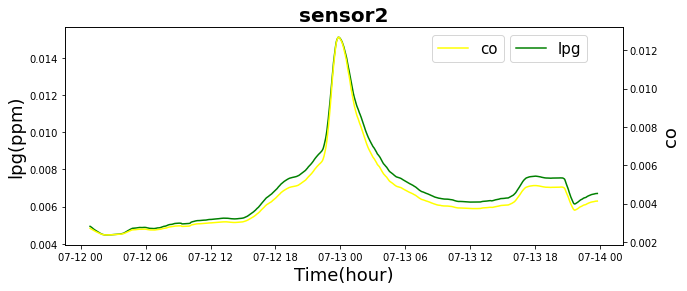

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


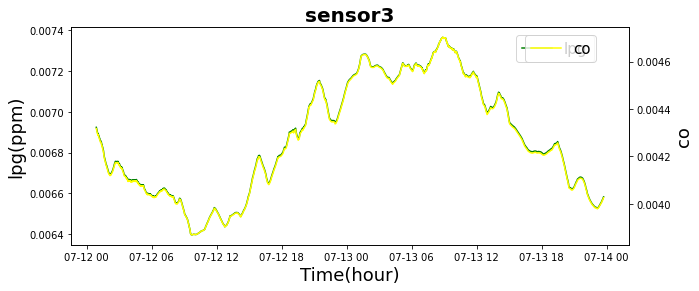

In [47]:
# Smoothing a Data by Moving Mean
# Plotting Temperature and Humidity in one subplot to estimate the trend
# We can use visuallization to detrmine the correlation as well

def lpg_co_plot(df,df_name):
  
      lpg_smoothed = df.lpg.rolling(window=500).mean() # Creating a series of averages of different subsets of the full data set
      co_smoothed = df.co.rolling(window=500).mean()

      plt.figure(figsize=(10,4))
      ax1 = sns.lineplot(df.date, lpg_smoothed ,color = 'green', label = 'lpg')
      ax1.set_title(f'{df_name}',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
      plt.ylabel('lpg(ppm)', fontsize = 18)
      plt.xlabel('Time(hour)', fontsize = 18)
      plt.legend(bbox_to_anchor= (0.95, 1),fontsize = 15)

      ax2 = ax1.twinx()
      ax2 = sns.lineplot(df.date, co_smoothed ,color = 'yellow', label = 'co')
      plt.ylabel('co', fontsize = 18)
      plt.legend(bbox_to_anchor= (0.80, 1),fontsize = 15)

      plt.show()

lpg_co_plot(df_sensor1,'sensor1')
lpg_co_plot(df_sensor2,'sensor2')
lpg_co_plot(df_sensor3,'sensor3')

In [48]:
# If features are strongly correlated we can remove them to prevent duplicating information

df.drop('co',axis = 1,inplace = True)
df_sensor1.drop(['co','smoke'],axis = 1, inplace = True)
df_sensor2.drop(['co','smoke'],axis = 1, inplace = True)
df_sensor3.drop(['co','smoke'],axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
# Visuallizing attribute against each day of record 
"""
days = df_sensor1['date'].dt.day.unique()
colors = np.random.choice(list(mpl.colors.TABLEAU_COLORS.keys()), len(days))

def plot_attribute_day(col,unit):

    plt.figure(figsize=(15,8))
    for i,d in enumerate(days):

          ax = sns.lineplot(df_sensor1['date'].dt.hour, df_sensor1.loc[df_sensor1['date'].dt.day == d, col] ,color = colors[i],label = f"day{d}th")
          ax.set_title(f'{col} vs. time',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
          plt.legend(fontsize = 15)
          plt.ylabel(col+f"({unit})", fontsize = 18)
          plt.xlabel('Time(Hour)', fontsize = 18)
          
    plt.show()

plot_attribute_day('lpg','ppm')
"""

'\ndays = df_sensor1[\'date\'].dt.day.unique()\ncolors = np.random.choice(list(mpl.colors.TABLEAU_COLORS.keys()), len(days))\n\ndef plot_attribute_day(col,unit):\n\n    plt.figure(figsize=(15,8))\n    for i,d in enumerate(days):\n\n          ax = sns.lineplot(df_sensor1[\'date\'].dt.hour, df_sensor1.loc[df_sensor1[\'date\'].dt.day == d, col] ,color = colors[i],label = f"day{d}th")\n          ax.set_title(f\'{col} vs. time\',fontdict= { \'fontsize\': 24, \'fontweight\':\'bold\'})\n          plt.legend(fontsize = 15)\n          plt.ylabel(col+f"({unit})", fontsize = 18)\n          plt.xlabel(\'Time(Hour)\', fontsize = 18)\n          \n    plt.show()\n\nplot_attribute_day(\'lpg\',\'ppm\')\n'

# Data Analysis

**1th:** Optimizing the lpg production

**2nd:** System alert for deviant behaviour

## First Analysis

* Calculating Standard Deviation for each day and each device and plotting with barplot
* Drawing lpg vs time for a day with a frequency of 1 hour
* Calculating the gradient of the curve
* Extract crititcal point with non-stable production of lpg

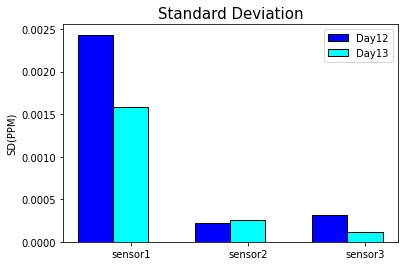

date  device           
12    00:0f:00:70:91:0a    0.002434
      1c:bf:ce:15:ec:4d    0.000220
      b8:27:eb:bf:9d:51    0.000316
13    00:0f:00:70:91:0a    0.001580
      1c:bf:ce:15:ec:4d    0.000258
      b8:27:eb:bf:9d:51    0.000117
Name: lpg, dtype: float64


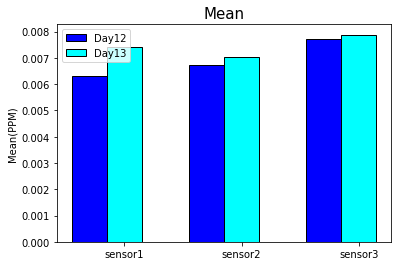

date  device           
12    00:0f:00:70:91:0a    0.006324
      1c:bf:ce:15:ec:4d    0.006724
      b8:27:eb:bf:9d:51    0.007717
13    00:0f:00:70:91:0a    0.007421
      1c:bf:ce:15:ec:4d    0.007023
      b8:27:eb:bf:9d:51    0.007882
Name: lpg, dtype: float64


In [21]:
# Comparing standard devation of different sensors in each day of record

x = df.groupby([df['date'].dt.day,'device'])['lpg'].std()
data_var = x.to_numpy().reshape(2,3)
barWidth = 0.3
bars1 = data_var[0]
bars2 = data_var[1]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Day12')
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Day13')
plt.xticks([r + barWidth for r in range(len(bars1))], ['sensor1', 'sensor2', 'sensor3'])
plt.ylabel('SD(PPM)')
plt.title("Standard Deviation", fontsize = 15)
plt.legend()
plt.show()
print(df.groupby([df['date'].dt.day,'device'])['lpg'].std())

# Comparing average of different sensors in each day of record

x = df.groupby([df['date'].dt.day,'device'])['lpg'].mean()
data_var = x.to_numpy().reshape(2,3)
barWidth = 0.3
bars1 = data_var[0]
bars2 = data_var[1]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Day12')
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='Day13')
plt.xticks([r + barWidth for r in range(len(bars1))], ['sensor1', 'sensor2', 'sensor3'])
plt.ylabel('Mean(PPM)')
plt.title("Mean", fontsize = 15)
plt.legend()
plt.show()
print(df.groupby([df['date'].dt.day,'device'])['lpg'].mean())


*In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range*

In [ ]:
# Finding out any linear or non-linear correlation btw attributes
# sns.pairplot(df_sensor1,kind="reg")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


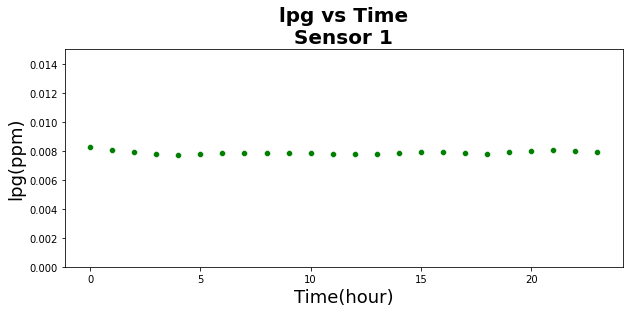

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


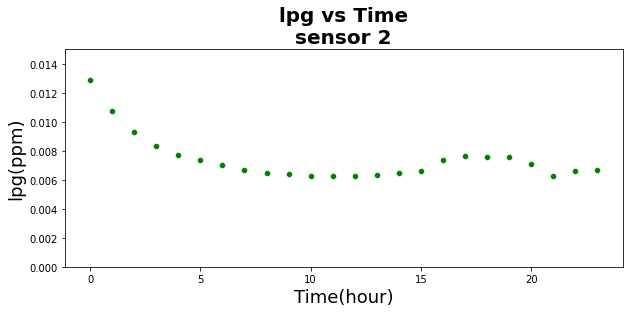

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


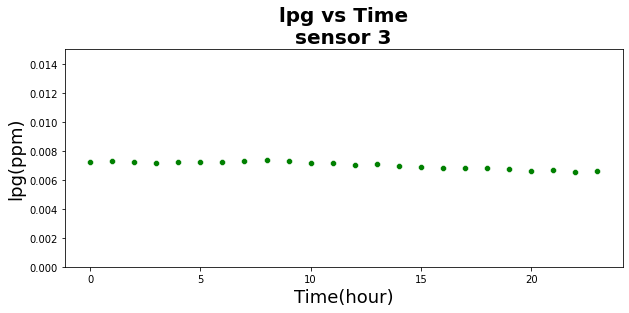

In [22]:
# TODO: Scatter-Plotting lpg vs time in a day to find out the trend


def lpg_time(df,df_name):

    df_lpg_time = df.loc[df.date.dt.day == 13 , ['date','lpg']]
    lpg_mean = df_lpg_time.groupby(pd.Grouper(freq='H', key='date'))['lpg'].mean()

    plt.figure(figsize=(10,4))
    ax1 = sns.scatterplot(np.arange(24), lpg_mean.to_list() ,color = 'green')
    ax1.set_ylim(0,0.015)
    ax1.set_title(f'lpg vs Time\n{df_name}',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
    plt.ylabel('lpg(ppm)', fontsize = 18)
    plt.xlabel('Time(hour)', fontsize = 18)


    plt.show()


lpg_time(df_sensor1,"Sensor 1")
lpg_time(df_sensor2,"sensor 2")
lpg_time(df_sensor3,"sensor 3")

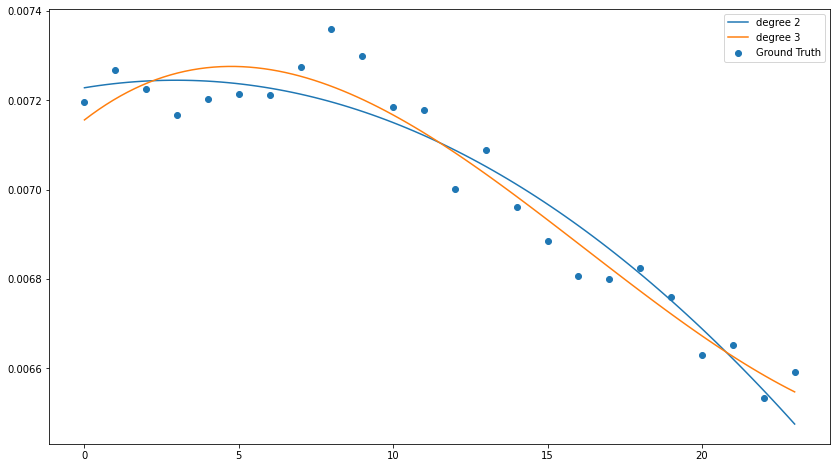

In [25]:
# Fitting sensor 2 with polynomial line
df_lpg_time = df_sensor3.loc[df_sensor3.date.dt.day == 13 , ['date','lpg']]
lpg_mean = df_lpg_time.groupby(pd.Grouper(freq='H', key='date'))['lpg'].mean()
lpg_mean.to_numpy()

plt.figure(figsize=(14,8))
plt.scatter(np.arange(24),lpg_mean.to_numpy(),label="Ground Truth")
plt.legend()

a,b,c = np.polyfit(np.arange(24),lpg_mean.to_numpy(),deg=2)
x = np.linspace(0,23,100)
y = a*x**2 + b*x + c
plt.plot(x,y,label="degree 2")
plt.legend()

a,b,c,d = np.polyfit(np.arange(24),lpg_mean.to_numpy(),deg=3)
x = np.linspace(0,23,100)
y = a*x**3 + b*x**2 + c*x + d
plt.plot(x,y,label="degree 3")
plt.legend()

In [26]:
# Calculating MSE of the fitting models
z = np.arange(24)
y1 = a*z**2 + b*z + c
y2 = a*z**3 + b*z**2 + c*z + d

subtracted1 = np.subtract(lpg_mean.to_numpy(),y1)
squared1 = np.square(subtracted1)
mse1 = squared1.mean()

subtracted2 = np.subtract(lpg_mean.to_numpy(),y2)
squared2 = np.square(subtracted2)
mse2 = squared2.mean()

print(f"the error for degree 2: {mse1}\nthe error for degree 3: {mse2}")

the error for degree 2: 4.9208425361815324e-05
the error for degree 3: 3.556550629857766e-09


In [ ]:
# Calculating the derivative of polynomial line
# Put an threshhold for notification
yy = np.polyfit(np.arange(24),lpg_mean.to_numpy(),deg=3)
p = np.poly1d(yy) # one-dimensional polynomial class
derivative  = np.polyder(p)
d = [(np.polyval(derivative,i)) for i in z]

for i in range(24):
  val = d[i]
  if val < 0:
    print(f"in {i} hour the lpg production is not stable")
    break

in 5 hour the lpg production is not stable


## Second Analysis

* Checking for deviant behavior
* Alert function for critical behaviour

In [27]:
def check_attr(df,parm1,parm2,cond):

  check_l1 = []
  check_l2 = []

  for i in range(len(df)):

    val1 = df[parm1].iloc[i]
    val2 = df[parm2].iloc[i]

    if (val1 > df.loc[:,parm1].mean()) or (val2 > df.loc[:,parm2].mean()): 
      check_l1.append([df.iloc[i]["date"],val1])

    if (df.at[df.index[i],cond] == True) and (val2 > df.loc[:,parm2].mean()) and (val1 > df.loc[:,parm1].mean()):
      check_l2.append([df.iloc[i]["date"],val1])

  print(f"\nThe Electrolzers {parm1} should be checked\n\n{check_l1[:5]}\n\n")
  print(f"The Electrolzers {parm1} is in danger mode\n")
  
  return check_l2

check = check_attr(df_sensor1,"temp","humidity","light")


The Electrolzers temp should be checked

[[Timestamp('2020-07-12 00:01:34.385974646'), 22.7], [Timestamp('2020-07-12 00:01:38.073572874'), 22.6], [Timestamp('2020-07-12 00:01:41.761234999'), 22.6], [Timestamp('2020-07-12 00:01:45.448863506'), 22.6], [Timestamp('2020-07-12 00:01:49.136686802'), 22.6]]


The Electrolzers temp is in danger mode



In [ ]:
def check_l2(df,thresh):

  
     for i in range(len(check)):
       
       val = df.temp.iloc[i]
       
       if val > 0.85 * thresh:
         print(f'the temerature is now {val} and close to threshhold')
         break

       elif val >= thresh:
         print(f'The temperature is now more than threshhold, please shut down the operation')
         break
 

warning = check_l2(df_sensor1,22.3)   